In [1]:
# Print GPU to see if we can render images
import tensorflow as tf
print('GPU version:' , tf.__version__)

# Prepare to work with directories
import os

# Required for visualization images
import matplotlib.pyplot as plt
import random
import cv2

# Enables copy paste and list creation/manipulation
from shutil import copy
from collections import defaultdict
import collections

GPU version: 2.3.0


#### Download the dataset. This should take up to 10 minutes.

In [2]:
# Check if the data has already been downloaded and download it if not
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Dataset does not already exist. Downloading the data and placing it into a directory.")
    #! placed infront of wget and tar to manually install as packages not in google colab
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    !tar xzf food-101.tar.gz
    # removed the "v" in the !tar so that we do not need to scroll a bunch

#### Details on using tar can be found here: https://www.cyberciti.biz/faq/linux-unix-extracting-specific-files/

In [3]:
# Download data and extract it to folder
get_data_extract()
print('Extraction complete!')

Dataset does not already exist. Downloading the data and placing it into a directory.
--2020-11-16 01:30:34--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2020-11-16 01:30:34--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  24.6MB/s    in 2m 53s  

2020-11-16 01:33:28 (27.5 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]

Extraction complete!


In [4]:
print('In the directory:' , os.listdir())
print('List within food-101:' , os.listdir('food-101'))
print('List within images:', os.listdir('food-101/images'))
print('\n\nMeta files...')
for file in os.listdir('food-101/meta/'):
  print(file, end = '; ')

In the directory: ['.config', 'food-101', 'pic.jpg', 'food-101.tar.gz', 'sample_data']
List within food-101: ['images', 'README.txt', 'meta', 'license_agreement.txt']
List within images: ['breakfast_burrito', 'hamburger', 'french_onion_soup', 'foie_gras', 'creme_brulee', 'cannoli', 'baby_back_ribs', 'spaghetti_carbonara', 'prime_rib', 'ravioli', 'lobster_roll_sandwich', 'cup_cakes', 'deviled_eggs', 'beef_tartare', 'pancakes', 'pulled_pork_sandwich', 'steak', 'sushi', 'cheese_plate', 'frozen_yogurt', 'clam_chowder', 'filet_mignon', 'tiramisu', 'pad_thai', 'beef_carpaccio', 'caprese_salad', 'eggs_benedict', 'greek_salad', 'peking_duck', 'hot_dog', 'crab_cakes', 'dumplings', 'red_velvet_cake', 'chicken_quesadilla', 'lasagna', 'falafel', 'baklava', 'hummus', 'scallops', 'mussels', 'poutine', 'macarons', 'donuts', 'churros', 'waffles', 'french_toast', 'shrimp_and_grits', 'miso_soup', 'panna_cotta', 'gnocchi', 'grilled_salmon', 'beignets', 'spaghetti_bolognese', 'hot_and_sour_soup', 'seaweed

#### Choose which food to classify moving forward and visualize.

In [5]:
img_dir = 'food-101/images/'
food1 = 'lobster_roll_sandwich' 
food2 = 'crab_cakes' 
food3 = 'fish_and_chips'

list_foods = [food1, food2 ,food3]
n_classes = len(list_foods)

print('Image category and count...')
for food in list_foods:
  print(food, len(os.listdir(img_dir+food)))

Image category and count...
lobster_roll_sandwich 1000
crab_cakes 1000
fish_and_chips 1000


Choose which food to classify moving forward and visualize.

Example images of selected foods...
food-101/images/lobster_roll_sandwich/215410.jpg


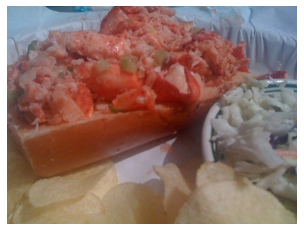

food-101/images/crab_cakes/2611772.jpg


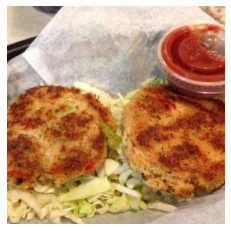

food-101/images/fish_and_chips/1915806.jpg


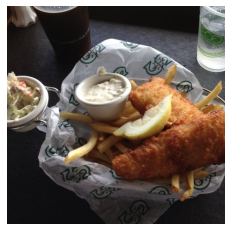

In [8]:
#Show example of images for food selected
print('Example images of selected foods...')
for food in list_foods:
  img = img_dir+food+'/'+random.choice(os.listdir(img_dir+food)) 
  print(img)
  image = cv2.imread(img)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

#### Create the test and train folders with the chosen foods.

In [9]:
def prepare_data(filepath, src, dest):
    classes_images = defaultdict(list)
    with open(filepath, 'r') as txt:
        # Read line by line within the text file
        lines = [read.strip() for read in txt.readlines()]
        for line in lines:
            # Split each section of the line into a list, exampe ('waffle','657578')
            food = line.split('/')
            # Only do this for foods within the list of food types
            if food[0] in list_foods:
                # Append to list named by class_images
                classes_images[food[0]].append(food[1] + '.jpg')
            
        for food in classes_images.keys():
            print("Copying images into ",food)
            if not os.path.exists(os.path.join(dest,food)):
                os.makedirs(os.path.join(dest,food))
            for i in classes_images[food]:
                copy(os.path.join(src,food,i), os.path.join(dest,food,i))


In [10]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...
Copying images into  crab_cakes
Copying images into  fish_and_chips
Copying images into  lobster_roll_sandwich


In [11]:
# Prepare test dataset by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...
Copying images into  crab_cakes
Copying images into  fish_and_chips
Copying images into  lobster_roll_sandwich


In [12]:
print('Files in the train folder...')
ttl_train = []
for file in os.listdir('food-101/train/'):
  x=len(os.listdir('food-101/train/'+file))
  ttl_train.append(x)
  print(file,x)
print('total:',sum(ttl_train))

print('\nFiles in the test folder...')
ttl_test = []
for file in os.listdir('food-101/test/'):
  x=len(os.listdir('food-101/test/'+file))
  ttl_test.append(x)
  print(file,x)
print('total:',sum(ttl_test))

Files in the train folder...
lobster_roll_sandwich 750
crab_cakes 750
fish_and_chips 750
total: 2250

Files in the test folder...
lobster_roll_sandwich 250
crab_cakes 250
fish_and_chips 250
total: 750


### Begin using Tensorflow.

Import TensorFlow Modules

In [13]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np


Image Augmentation
Image augmentation is a technique to apply transformations to original images that involves shifting, rotating, zooming, contrasting etc. This provides more robust model under various image qualities.

For example:

*) rotation_range = shocks to rotation of image and fill_node=nearest replaces the empty pixel (due to rotation) with nearby values

*) width_shift_range/height_shift_range = Moving object/image out of "center"

*) brightness_range = Shock brightness

In [14]:
#deletes old and starts anew
K.clear_session()
train_data_dir, validation_data_dir = 'food-101/train', 'food-101/test'
nb_train_samples, nb_validation_samples = 2250, 750
batch_size = 20

train_imgdatagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.4,1.5],
    fill_mode='nearest')

test_imgdatagen = ImageDataGenerator(rescale=1. / 255)
#Takes the path to a directory & generates batches of augmented data.
train_gen = train_imgdatagen.flow_from_directory(
    train_data_dir,
    batch_size=batch_size,
    seed = 23,
    class_mode='categorical')

#Takes the path to a directory & generates batches of augmented data.
test_gen = test_imgdatagen.flow_from_directory(
    validation_data_dir,
    batch_size=batch_size,
    seed = 23,
    class_mode='categorical')

#InceptionV3 is a convolutional neural network (CNN) used for image classification tasks.
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x) #layer
x = Dense(512,activation='relu')(x) #layer

#Softmax function is frequently used for classification tasks (prediction)
predictions = Dense(3,kernel_regularizer=regularizers.l2(0.01), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
#Stochastic Gradient Descent

history = model.fit(train_gen,
          steps_per_epoch = nb_train_samples // batch_size,
          validation_data=test_gen,
          validation_steps=nb_validation_samples // batch_size,
          epochs=5,
          verbose=1)

model.save('Alfred_model_trained.hdf5')
print ('Model trained & saved')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/5
112/112 [==============================] - 54s 479ms/step - loss: 0.8439 - accuracy: 0.6740 - val_loss: 0.4114 - val_accuracy: 0.8608
Epoch 2/5
112/112 [==============================] - 53s 469ms/step - loss: 0.4432 - accuracy: 0.8498 - val_loss: 0.2431 - val_accuracy: 0.9392
Epoch 3/5
112/112 [==============================] - 53s 472ms/step - loss: 0.3364 - accuracy: 0.9004 - val_loss: 0.1997 - val_accuracy: 0.9486
Epoch 4/5
112/112 [==============================] - 53s 473ms/step - loss: 0.3042 - accuracy: 0.9081 - val_loss: 0.2173 - val_accuracy: 0.9446
Epoch 5/5
112/112 [==============================] - 53s 473ms/step - loss: 0.2703 - accuracy: 0.9224 - val_loss: 0.1912 - val_accuracy: 0.9500
Model trained & saved


Text(0.5, 1.0, 'CNN Model Accuracy & Loss Results')

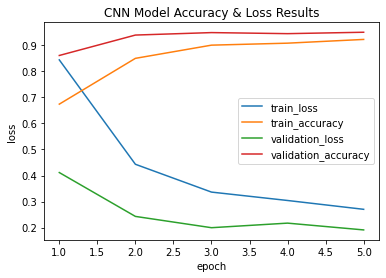

In [15]:
xData =[i for i in range(1,6)]
for key in history.history.keys():
  plt.plot(xData,history.history[key])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','train_accuracy', 'validation_loss', 'validation_accuracy'], loc='best')
plt.title('CNN Model Accuracy & Loss Results')

#### Use the model.

In [16]:
# Loading the best saved model to make predictions
%%time
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

K.clear_session()
model_best = load_model('Alfred_model_trained.hdf5',compile = False)

CPU times: user 2.44 s, sys: 88.3 ms, total: 2.53 s
Wall time: 2.48 s


In [17]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

def predict_class(model, img, show = True):
  img = image.img_to_array(image.load_img(img, target_size=(299, 299)))                    
  img = np.expand_dims(img, axis=0)         
  img /= 255.                                      

  pred = model.predict(img)
  index = np.argmax(pred)
  list_foods.sort()
  pred_value = list_foods[index]
  plt.imshow(img[0])
  plt.axis('off')
  plt.title(pred_value)
  plt.show()

In [18]:
from tensorflow.keras.preprocessing import image

!wget -O pic.jpg https://www.simplyrecipes.com/wp-content/uploads/2020/07/New-England-Lobster-Rolls-LEAD-3c.jpg

--2020-11-16 01:54:00--  https://www.simplyrecipes.com/wp-content/uploads/2020/07/New-England-Lobster-Rolls-LEAD-3c.jpg
Resolving www.simplyrecipes.com (www.simplyrecipes.com)... 104.18.26.248, 104.18.27.248, 2606:4700::6812:1bf8, ...
Connecting to www.simplyrecipes.com (www.simplyrecipes.com)|104.18.26.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271635 (265K) [image/jpeg]
Saving to: ‘pic.jpg’

pic.jpg             100%[===================>] 265.27K  --.-KB/s    in 0.006s  

2020-11-16 01:54:00 (45.7 MB/s) - ‘pic.jpg’ saved [271635/271635]



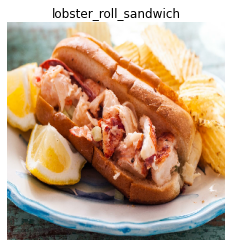

In [19]:
predict_class(model_best, 'pic.jpg', True)

In [5]:
run history

ERROR:root:File `'history.py'` not found.


Save it

In [20]:
!mkdir -p saved_model
model.save('saved_model/Alfred_model_trained.hdf5')

In [21]:
!ls saved_model

Alfred_model_trained.hdf5


In [22]:
from google.colab import files
files.download('saved_model/Alfred_model_trained.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>